Le meilleur type de contrat basé sur le modèle est: CDI


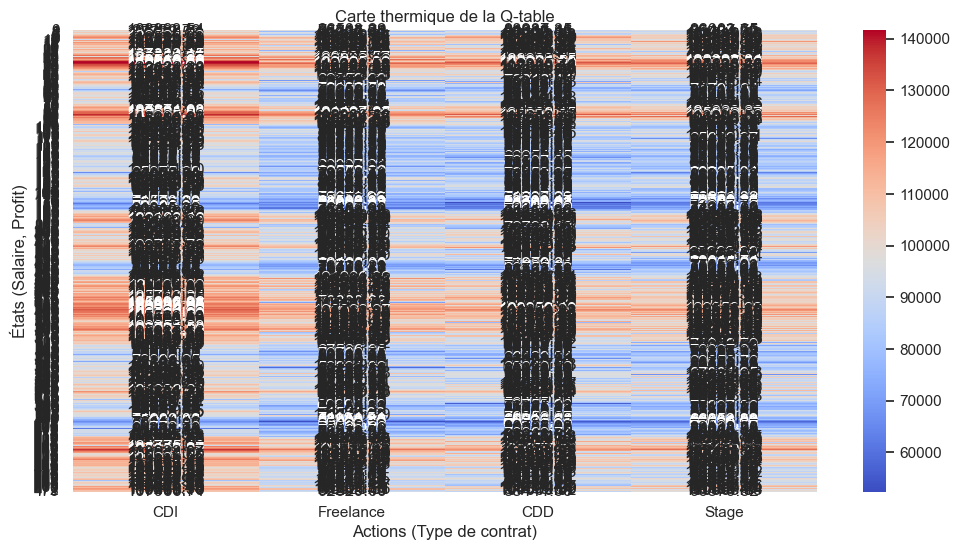

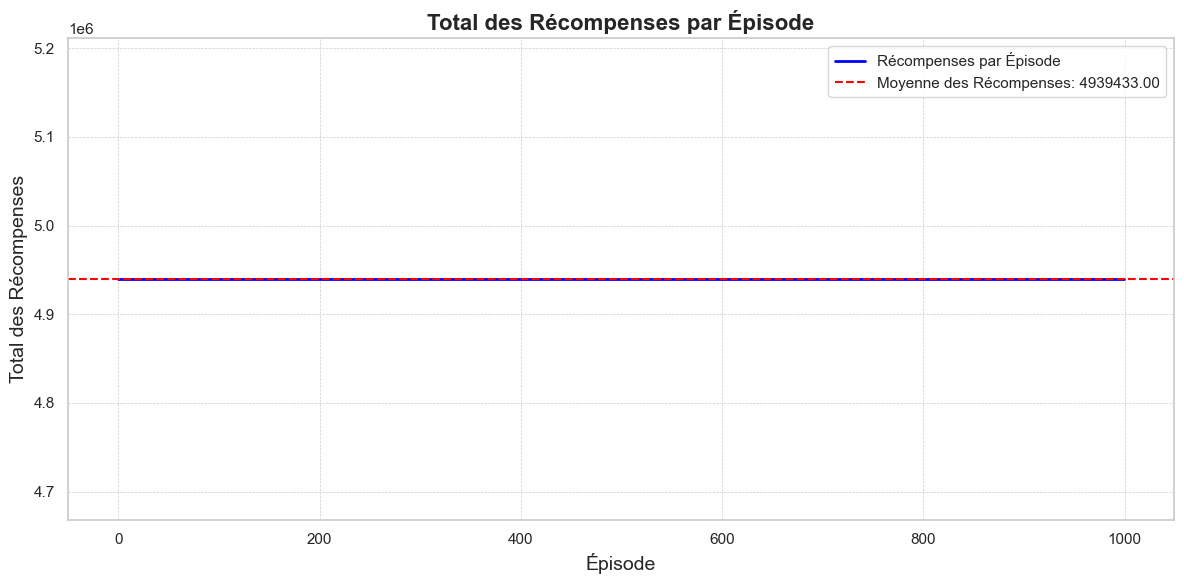

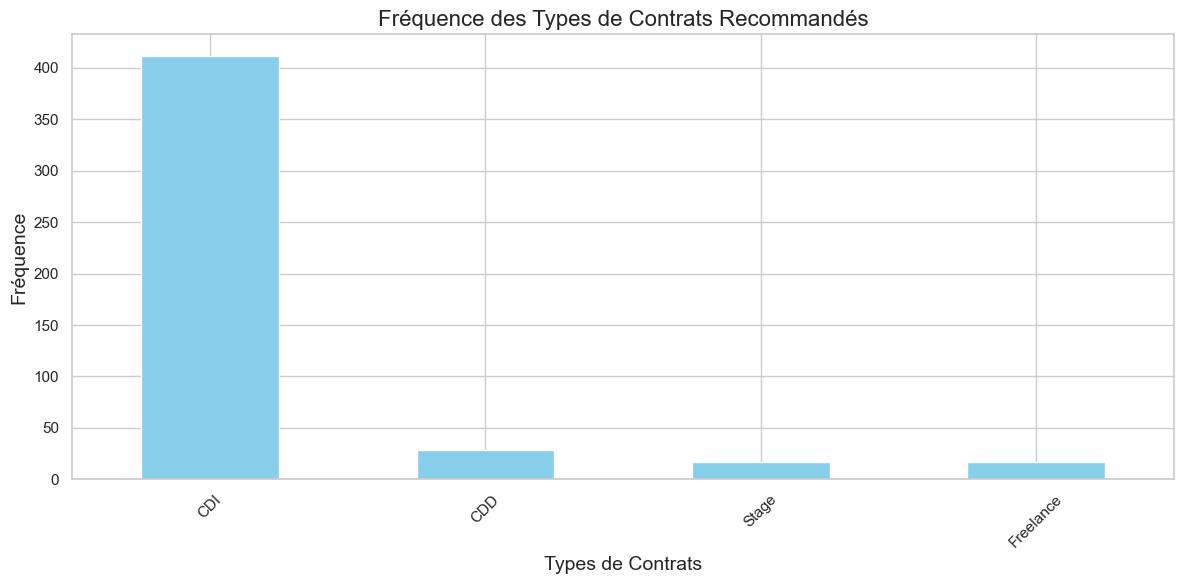

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
data = pd.read_csv('data_IA.csv')

# Préparer les états (salaire, profit) et les actions (type de contrat)
states = data[['salaire', 'profit']].values
actions = data['type_contrat'].unique()  # Les types de contrat comme actions possibles
num_states = len(states)
num_actions = len(actions)

# Paramètres de l'algorithme Q-learning
alpha = 0.1  # Taux d'apprentissage
gamma = 0.9  # Facteur de discount
epsilon = 0.1  # Taux d'exploration (10% d'exploration, 90% d'exploitation)
num_episodes = 1000  # Nombre d'épisodes
q_table = np.zeros((num_states, num_actions))  # Initialiser la Q-table

# Fonction pour choisir une action (type de contrat)
def choose_action(state_index):
    if np.random.rand() < epsilon:
        return np.random.choice(num_actions)
    else:
        return np.argmax(q_table[state_index])

# Fonction pour calculer la récompense (profit - coût lié au salaire)
def get_reward(state):
    salaire, profit = state
    reward = profit - salaire  # Récompense basée sur la différence entre profit et salaire
    return reward

# Boucle d'entraînement de Q-learning
rewards_per_episode = []

for episode in range(num_episodes):
    total_reward = 0
    for state_index in range(num_states):
        # Choisir une action (type de contrat)
        action_index = choose_action(state_index)
        
        # Obtenir l'état (salaire et profit) et calculer la récompense
        state = states[state_index]
        reward = get_reward(state)
        total_reward += reward
        
        # Transition vers le prochain état (simplement suivant dans l'ensemble des états)
        next_state_index = (state_index + 1) % num_states
        
        # Mettre à jour la Q-table
        q_table[state_index, action_index] += alpha * (reward + gamma * np.max(q_table[next_state_index]) - q_table[state_index, action_index])
    
    rewards_per_episode.append(total_reward)

# Résultats finaux
best_actions = np.argmax(q_table, axis=1)  # Meilleures actions pour chaque état
best_contracts = [actions[i] for i in best_actions]  # Correspondre les actions aux contrats
contract_counts = pd.Series(best_contracts).value_counts()

# Afficher le meilleur type de contrat
best_contract_type = contract_counts.idxmax()
print(f"Le meilleur type de contrat basé sur le modèle est: {best_contract_type}")

# Visualisation de la Q-table
plt.figure(figsize=(12, 6))
sns.heatmap(q_table, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=actions, yticklabels=range(num_states))
plt.title('Carte thermique de la Q-table')
plt.xlabel('Actions (Type de contrat)')
plt.ylabel('États (Salaire, Profit)')
plt.show()

# Afficher un graphique des récompenses par épisode (amélioré)
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Tracer les récompenses avec un lissage pour lisser les fluctuations
sns.lineplot(x=range(num_episodes), y=rewards_per_episode, color='blue', linewidth=2, label="Récompenses par Épisode")

# Ajouter une ligne moyenne
mean_reward = np.mean(rewards_per_episode)
plt.axhline(mean_reward, color='red', linestyle='--', label=f'Moyenne des Récompenses: {mean_reward:.2f}')

# Titre et axes
plt.title('Total des Récompenses par Épisode', fontsize=16, fontweight='bold')
plt.xlabel('Épisode', fontsize=14)
plt.ylabel('Total des Récompenses', fontsize=14)

# Ajustements graphiques
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Afficher le graphique
plt.show()

# Visualisation des types de contrats choisis
plt.figure(figsize=(12, 6))
contract_counts.plot(kind='bar', color='skyblue')
plt.title('Fréquence des Types de Contrats Recommandés', fontsize=16)
plt.xlabel('Types de Contrats', fontsize=14)
plt.ylabel('Fréquence', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
